Given an m x n matrix matrix and an integer k, return the max sum of a rectangle in the matrix such that its sum is no larger than k.

It is guaranteed that there will be a rectangle with a sum no larger than k.

 

Example 1:

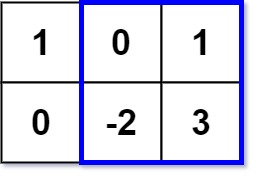

Input: matrix = [[1,0,1],[0,-2,3]], k = 2
Output: 2
Explanation: Because the sum of the blue rectangle [[0, 1], [-2, 3]] is 2, and 2 is the max number no larger than k (k = 2).

Example 2:

Input: matrix = [[2,2,-1]], k = 3
Output: 3

 

Constraints:

    m == matrix.length
    n == matrix[i].length
    1 <= m, n <= 100
    -100 <= matrix[i][j] <= 100
    -105 <= k <= 105

 

Follow up: What if the number of rows is much larger than the number of columns?


In [64]:
from typing import List
from math import inf

class Solution:
    def maxSumSubmatrix(self, matrix: List[List[int]], k: int) -> int:
        maxsum = k
        prefixsums = [[0 for _ in range(len(matrix[0]) + 1)] for _ in range(len(matrix) + 1)]
        for i in range(1, len(prefixsums)):
            prefixsums[i][1] = prefixsums[i - 1][1] + matrix[i - 1][0]
            for j in range(2, len(prefixsums[0])):
                prefixsums[i][j] = prefixsums[i][j - 1] + matrix[i - 1][j - 1]

        bestsum = -inf
        for i in range(len(prefixsums) - 1):
            for j in range(len(prefixsums[0]) - 1):
                for k in range(i + 1, len(prefixsums)):
                    for l in range(j + 1, len(prefixsums[0])):
                        currsum = prefixsums[k][l] - prefixsums[i][l] - prefixsums[k][j] + prefixsums[i][j]
                        if bestsum < currsum <= maxsum:
                            bestsum = currsum
                        if bestsum == maxsum:
                            return maxsum
        return bestsum

In [ ]:
class Solution:
    def maxSumSubmatrix(self, matrix: List[List[int]], k: int) -> int:
        ans = float("-inf")
        m, n = len(matrix), len(matrix[0])
        for i in range(n):
            lstSum = [0] * m
            for j in range(i, n):
                currSum = 0
                curlstSum = [0]
                for t in range(m):
                    lstSum[t] += matrix[t][j]
                    currSum += lstSum[t]
                    pos = bisect_left(curlstSum, currSum - k)
                    if pos < len(curlstSum):
                        if curlstSum[pos] == currSum - k:
                            return k
                        else:
                            ans = max(ans, currSum - curlstSum[pos])
                    insort(curlstSum, currSum)
        return ans

In [65]:
s = Solution()
s.maxSumSubmatrix([[1,0,1],[0,-2,3]], 2)

2

In [66]:
s.maxSumSubmatrix([[2, 2, -1]], 0)

-1